In [24]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
from pylab import mpl, plt
import pytz

In [25]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [26]:
plt.rcParams['figure.figsize'] = (20,4)
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [27]:
ativo = 'WDOH22'

In [91]:
def get_ohlc(ativo, timeframe, n=5):
    ativo = mt5.copy_rates_from_pos(ativo, timeframe, 0, n)
    ativo = pd.DataFrame(ativo)
    ativo['time'] = pd.to_datetime(ativo['time'], unit='s')
    ativo.set_index('time', inplace=True)
    return ativo

In [92]:
df = get_ohlc(ativo, mt5.TIMEFRAME_M1, 500)

In [93]:
df = df.loc['2022-02-18']

In [112]:
df['OBV'] = ta.obv(df['close'], df['real_volume'])
df['Dif-obv'] = df['OBV'].pct_change()

# returns = (np.log(data).diff()).dropna()

In [113]:
df['amp-real'] = abs(df['close'] - df['open'])
df['amp-total'] = df['high'] - df['low']

In [114]:
# volume / aplitude ( vol / (close-open) )
df['vol-amp-real'] = df['real_volume'] / df['amp-real']
df['vol-amp-total'] = df['real_volume'] / df['amp-total']

In [115]:
df

,open,high,low,close,tick_volume,spread,real_volume,OBV,Dif-obv,amp-real,amp-total,vol-amp-real,vol-amp-total
time,,,,,,,,,,,,,
2022-02-18 09:00:00,5176.0,5178.0,5172.0,5173.5,1168,0,10172,10172.0,NaN,2.5,6.0,4068.8,1695.333333
2022-02-18 09:01:00,5174.0,5178.0,5172.5,5174.0,1346,500,9772,19944.0,0.960676,0.0,5.5,inf,1776.727273
2022-02-18 09:02:00,5174.0,5176.0,5173.5,5175.0,478,500,3151,23095.0,0.157992,1.0,2.5,3151.0,1260.400000
2022-02-18 09:03:00,5175.0,5175.5,5172.5,5173.0,456,500,4203,18892.0,-0.181987,2.0,3.0,2101.5,1401.000000
2022-02-18 09:04:00,5173.5,5175.0,5170.0,5175.0,1133,500,10407,29299.0,0.550868,1.5,5.0,6938.0,2081.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18 13:37:00,5132.5,5132.5,5130.0,5130.5,384,500,3198,-182927.0,0.017793,2.0,2.5,1599.0,1279.200000
2022-02-18 13:38:00,5130.5,5133.5,5129.5,5133.0,515,500,8281,-174646.0,-0.045269,2.5,4.0,3312.4,2070.250000
2022-02-18 13:39:00,5133.0,5134.0,5132.0,5132.5,226,500,1936,-176582.0,0.011085,0.5,2.0,3872.0,968.000000


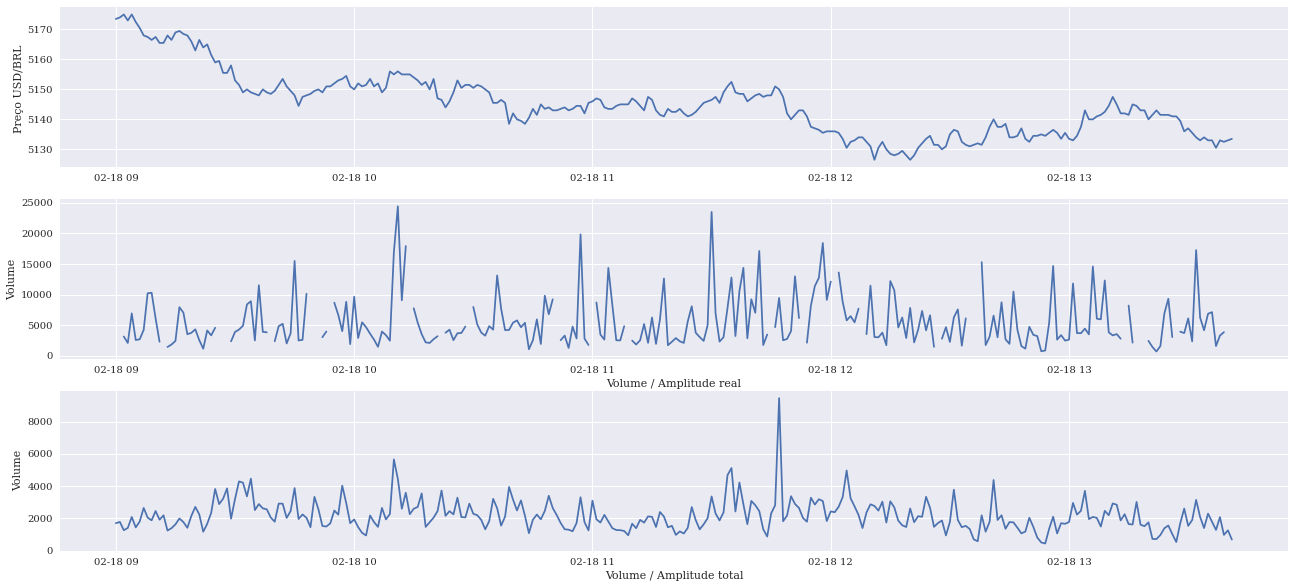

In [116]:
plt.figure(figsize=(22,10))
plt.subplot(311)
plt.ylabel('Preço USD/BRL ')
plt.plot('close', data=df);

plt.subplot(312)
plt.xlabel('Volume / Amplitude real')
plt.ylabel('Volume')
plt.plot('vol-amp-real', data=df);

plt.subplot(313)
plt.ylabel('Volume')
plt.xlabel('Volume / Amplitude total')
plt.plot('vol-amp-total', data=df);

#plt.subplot(512)
#plt.plot('Dif-obv', data=df);

#plt.subplot(513)
#plt.plot('OBV', data=df);


In [ ]:
while True:
    ativo1 = 'WDOZ21'
    #hora_agora = datetime.now()
    #to_dentro_horario = hora_agora >= horario_open_mercado and hora_agora <= horario_close_mercado
    ordens_abertas = mt5.orders_total()
    posicoes_abertas = mt5.positions_total()

    print('Ordens Abertas: ' + str(ordens_abertas))
    print('Posições Abertas: ' + str(posicoes_abertas))

    #melhroar extração de de dados realtime
    df1 = mt5.copy_ticks_from(ativo1, datetime(2020, 10, 21),10000000, mt5.COPY_TICKS_ALL)
    df1 = pd.DataFrame(df1)
    df1['time'] = pd.to_datetime(df1['time'], unit='s')
    df1.drop(['flags', 'time', 'time_msc', 'volume_real'], axis = 1, inplace=True)
    df1['IFR18'] = ta.rsi(df1['last'], length=18)
    df1['IFR21'] = ta.rsi(df1['last'], length=21)
    #df['IFR50'] = ta.rsi(df['last'], length=50)
    #df['IFR100'] = ta.rsi(df['last'], length=100)
    #df['IFR200'] = ta.rsi(df['last'], length=200)


In [ ]:
    last1=df1[-1:]
    IFR1 = np.array(last1['IFR18'])
    IFR2 = np.array(last1['IFR21'])
    dist20 = np.array(last1['Dist20'])
    print(last1)
    print(IFR1)
    print(dist20)

#venda:
    if(IFR1 > 65.0):
        ordem_venda(ativo1, 1, 10000, 1500)
    elif(dist20 > 1.0):
        ordem_venda(ativo1, 2, 10000, 1500)
    
#compra:
    elif(IFR1 < 35.0):
        ordem_compra(ativo1, 1, 10000, 1500)
    elif(dist20 < 1.0):
        ordem_compra(ativo1, 2, 10000, 1500)